In [173]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/user/Downloads/ml-latest-small/ratings.csv")
df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [174]:
m_title = pd.read_csv("C:/Users/user/Downloads/ml-latest-small/movies.csv")
m_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [175]:
df = pd.merge(df,m_title,on="movieId")
df = df.rename(columns={"movieId":"item_id"})
df.head()

,userId,item_id,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
%matplotlib inline


In [177]:
#df = df[:50000]
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [178]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [179]:
ratings["num_ratings"] = df.groupby("title")["rating"].count()
ratings.head()

,rating,num_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


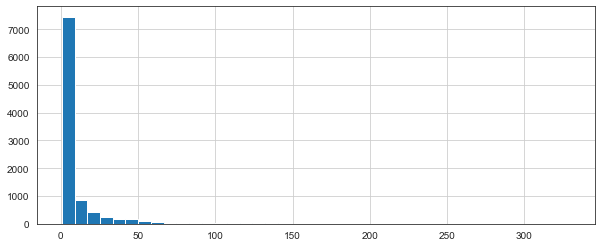

In [180]:
plt.figure(figsize=(10,4))
ratings["num_ratings"].hist(bins=40)

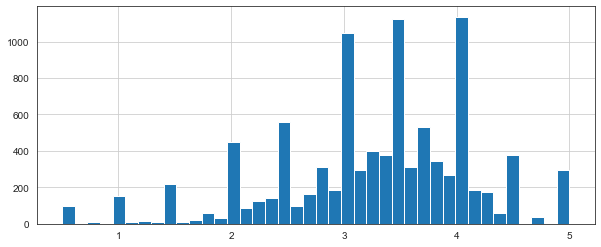

In [181]:
plt.figure(figsize=(10,4))
ratings["rating"].hist(bins=40)

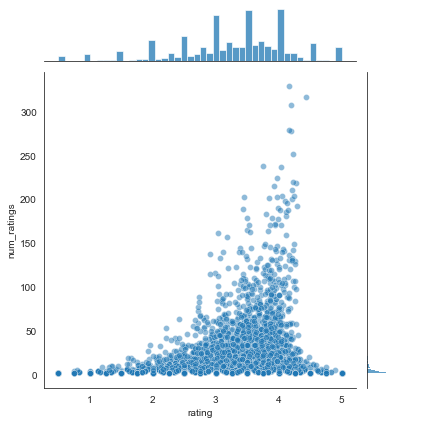

In [182]:
sns.jointplot(x="rating",y="num_ratings",data=ratings,alpha=0.5)

In [183]:
moviemat = df.pivot_table(index="userId",columns="title",values="rating")
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
ratings.sort_values("num_ratings",ascending=False).head(10)

,rating,num_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [185]:
matrix_urating = moviemat["Matrix, The (1999)"]

matrix_urating.head()

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [186]:
similar_matrix = moviemat.corrwith(matrix_urating)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [187]:
corrmatrix = pd.DataFrame(similar_matrix,columns=["correlation"])
corrmatrix.dropna(inplace=True)
corrmatrix.head()

,correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [188]:
corrmatrix = corrmatrix.sort_values("correlation",ascending = False)


In [189]:
corrmatrix = corrmatrix.join(ratings["num_ratings"])


In [190]:
corrmatrix.head(10)

,correlation,num_ratings
title,,
Haywire (2011),1.0,3
"Wolfman, The (2010)",1.0,2
"War Zone, The (1999)",1.0,2
"Hitcher, The (1986)",1.0,4
Gross Anatomy (a.k.a. A Cut Above) (1989),1.0,2
Paper Towns (2015),1.0,2
Juwanna Mann (2002),1.0,2
Topsy-Turvy (1999),1.0,4
All the King's Men (2006),1.0,3


In [191]:
corrmatrix[corrmatrix["num_ratings"]>50].sort_values("correlation",ascending=False).head()

,correlation,num_ratings
title,,
"Matrix, The (1999)",1.000000,278
Slumdog Millionaire (2008),0.613839,71
Kung Fu Panda (2008),0.612549,54
Interstellar (2014),0.599040,73
Legends of the Fall (1994),0.567155,68
